# Lumber Prices

* **Data:** `lumber-prices.csv`
* **Description:** Chicago lumber futures per 1000 board feet, in USD, as of some time in 2021. To keep things simple, we're going to say that this is the measurement over a month instead of just one date per month. Basically: each month, how much you'd pay if you bought 125 2x4 boards at the hardware store.
* **Source:** https://tradingeconomics.com/commodity/lumber
* **Columns of interest:**
    * `Open` is the price at the start of the month
    * `High` is the high price over the course of the month
    * `Low` is the low number over the course of the month
    * `Close` is the number at the end of the month

## Read in your data

In [113]:
import pandas as pd
df = pd.read_csv("lumber-prices.csv")
df.describe()
df.head(20)

,open,high,low,close,date
0,$407.00,$424.70,$377.00,$424.70,1996-12-09T00:00:00
1,$426.00,$450.50,$395.00,$411.40,1997-01-02T00:00:00
2,$408.50,$421.50,$382.10,$383.50,1997-02-03T00:00:00
3,$386.00,$389.70,$355.00,$380.50,1997-03-03T00:00:00
4,$378.00,$417.50,$376.50,$403.10,1997-04-01T00:00:00
5,$401.90,$404.40,$370.10,$380.50,1997-05-01T00:00:00
6,$387.50,$393.10,$347.10,$378.00,1997-06-02T00:00:00
7,$380.60,$380.90,$332.00,$343.70,1997-07-01T00:00:00
8,$342.00,$365.90,$341.10,$356.70,1997-08-01T00:00:00
9,$356.70,$364.40,$290.50,$296.60,1997-09-02T00:00:00


## What is the earliest month in this dataset?

We only have one reading per month, so you could also read this as "what is the earliest date in the dataset"

In [114]:
#df.date = df.date.str.replace("T00:00:00", "")


df['date'] = pd.to_datetime(df['date'], format= '%Y-%m-%d')


df['month'] = df['date'].dt.month
df.head()


df['date'].min()

Timestamp('1996-12-09 00:00:00')

## What is the most recent month in this dataset?

We only have one reading per month, so you could also read this as "what is the earliest date in the dataset"

In [115]:
df['date'].max()

Timestamp('2021-11-01 00:00:00')

## What 3 months had the highest high lumber price?

In [116]:
df.groupby('month')['high'].max().sort_values(ascending=False).head(3)

month
8     $934.50
1     $912.20
12    $900.50
Name: high, dtype: object

## What 3 months had the lowest low lumber price?

In [117]:
df.groupby('month')['low'].min().sort_values(ascending=False).head(3)

month
11    $182.60
6     $175.20
8     $170.30
Name: low, dtype: object

## What is the median "high" lumber price in our dataset?

In [120]:
#df.high = df.high.str.replace("$","")
df.head()
df.low = df.low.str.replace("$","")
df.high.median()

/var/folders/t3/wdvr53w53sxctv2njm810gsh0000gn/T/ipykernel_19182/755750542.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.low = df.low.str.replace("$","")


329.65

## What is the median "low" lumber price in our dataset?

In [121]:
df.low.median()

286.1

## Plot the maximum "high" lumber price on an annual basis.

<AxesSubplot: xlabel='year'>

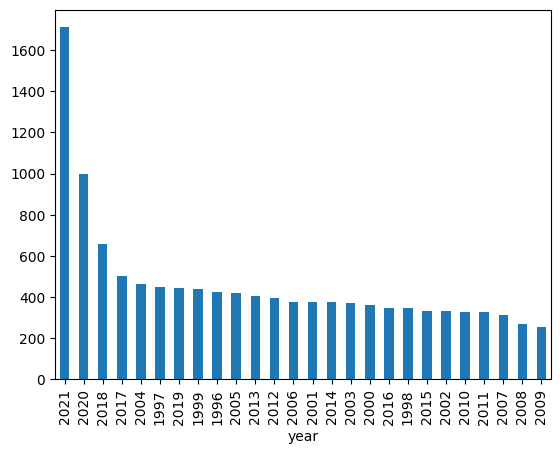

In [122]:
df['year'] = df['date'].dt.year
df.head()
df.year = df.year.astype(int)
df.high = df.high.astype(float)
df.low = df.low.astype(float)
df.groupby('year')['high'].max().sort_values(ascending=False).plot(kind='bar')


## Plot the lowest "low" lumber price on an annual basis.

<AxesSubplot: xlabel='year'>

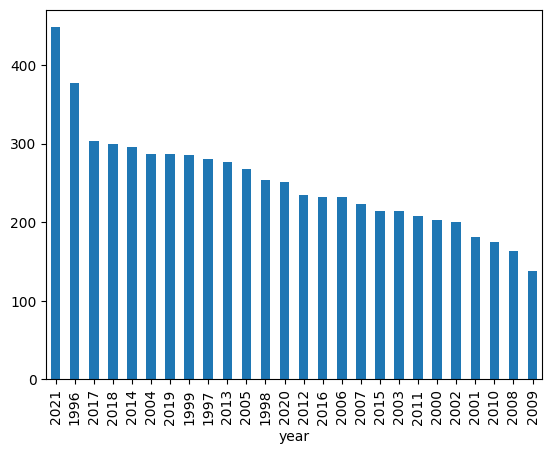

In [123]:
df.groupby('year')['low'].min().sort_values(ascending=False).plot(kind='bar')

## Plot the median "close" lumber price on an quarterly basis.

In [128]:
#df.close = df.close.astype(str)
#df.close = df.close.str.replace("$","")
#df.close = df.close.astype(float)
df.close.median()

305.65

## What month in our dataset had the largest swing between high and low?

You'll want to create a new column for this one

In [130]:
df['difference'] = df['high'] - df['low']
df.groupby('date')['difference'].max().sort_values(ascending=False).head(1)


date
2021-06-01    675.0
Name: difference, dtype: float64

## In how many months did lumber prices rise?

If the price was greater at the end of the month than the beginning of the month, we'll say the price rose.

In [141]:
#df.open = df.open.astype(str)
#df.open = df.open.str.replace("$","")
df.open = df.open.astype(float)

df[df.close > df.open].groupby('month')['close'].count().sort_values(ascending=False)

month
11    19
1     15
10    14
12    13
4     12
5     12
7     12
2     11
3     11
6     10
8     10
9      6
Name: close, dtype: int64

## How many months did lumber prices drop?

If the price was lower at the end of the month than the beginning of the month, we'll say the price dropped.

In [143]:
df[df.open > df.close].groupby('month')['open'].count().sort_values(ascending=False)

month
9     19
6     15
8     15
2     14
3     14
4     13
5     13
7     13
12    12
10    11
1     10
11     6
Name: open, dtype: int64

## In 2020, how many months saw lumber prices rise vs lumber prices fall?

In [146]:
df[df.year == 2020][df.open > df.close].groupby('month')['open'].count().sort_values(ascending=False) #4 months where prices fell
df[df.year == 2020][df.close > df.open].groupby('month')['close'].count().sort_values(ascending=False) #8 months where prices rose

/var/folders/t3/wdvr53w53sxctv2njm810gsh0000gn/T/ipykernel_19182/3508000699.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.year == 2020][df.open > df.close].groupby('month')['open'].count().sort_values(ascending=False) #4


month
2     1
3     1
9     1
10    1
Name: open, dtype: int64

## In 2000, how many months saw lumber prices rise vs lumber prices fall?

In [148]:
df[df.year == 2000][df.open > df.close].groupby('month')['open'].count().sort_values(ascending=False) #10 months where prices fell
#df[df.year == 2000][df.close > df.open].groupby('month')['close'].count().sort_values(ascending=False) #2 months where prices rose

/var/folders/t3/wdvr53w53sxctv2njm810gsh0000gn/T/ipykernel_19182/1022758666.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.year == 2000][df.open > df.close].groupby('month')['open'].count().sort_values(ascending=False) # months where prices fell


month
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
10    1
12    1
Name: open, dtype: int64